In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [3]:
def landnum_modifier(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x).replace('외', '').replace(' ','')
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [4]:
def yunrip_data_prep():
    basedir = './국토교통부_실거래가_공개시스템/연립다세대/매매/'
    filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]
    
    dfs_list = []
    for i, f in tqdm(enumerate(filenames)):
        df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
        if '해제사유발생일' in df.columns.tolist():
            df = df.drop(columns=['해제사유발생일'])

        dfs_list.append(df)
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)
    
    concat_df['계약년월'] = concat_df['계약년월'].apply(str)
    concat_df['계약일'] = concat_df['계약일'].apply(str)
    
    concat_df['건물연식'] = concat_df['계약년월'].apply(lambda x: int(x[:4])) - concat_df['건축년도']
    
    concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)
    
    concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
    + '-' + concat_df['계약일']
    
    concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')
    
    concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
    concat_df['전용면적단가(만원/㎡)'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']
    
    concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
    
    concat_df['년'] = concat_df['계약날짜'].dt.year
    
    cols_to_drop = ['시군구', '번지', '본번', '부번', '지번주소', '계약년월', '계약일', '도로명']
    
    concat_df = concat_df[concat_df['년'] >= 2015]
    
    return concat_df[['지번주소'] + [col for col in concat_df.columns if col not in cols_to_drop]]

In [5]:
def officetel_data_prep():
    basedir = './국토교통부_실거래가_공개시스템/오피스텔/매매/'
    filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]
    
    dfs_list = []
    for i, f in tqdm(enumerate(filenames)):
        df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
        if '해제사유발생일' in df.columns.tolist():
            df = df.drop(columns=['해제사유발생일'])

        dfs_list.append(df)
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)
    
    concat_df['계약년월'] = concat_df['계약년월'].apply(str)
    concat_df['계약일'] = concat_df['계약일'].apply(str)
    
    concat_df['건물연식'] = concat_df['계약년월'].apply(lambda x: int(x[:4])) - concat_df['건축년도']
    
    concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)
    
    concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
    + '-' + concat_df['계약일']
    
    concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')
    
    concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
    concat_df['전용면적단가(만원/㎡)'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']
    
    concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
    
    concat_df['년'] = concat_df['계약날짜'].dt.year
    
    cols_to_drop = ['시군구', '번지', '본번', '부번', '지번주소', '계약년월', '계약일', '도로명']
    
    concat_df = concat_df[concat_df['년'] >= 2015]
        
    return concat_df[['지번주소'] + [col for col in concat_df.columns if col not in cols_to_drop]]

In [6]:
yunrip_df = yunrip_data_prep().dropna().reset_index(drop=True)
print(yunrip_df.shape)
yunrip_df.head()

16it [00:01,  8.82it/s]


(329997, 11)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년
0,서울특별시 강남구 개포동 1216-4,(1216-4),33.77,21.67,24800,4,2012.0,3.0,2015-03-26,734.379627,2015
1,서울특별시 강남구 개포동 1216-4,(1216-4),35.87,23.02,27200,4,2012.0,3.0,2015-06-23,758.293839,2015
2,서울특별시 강남구 개포동 1216-4,(1216-4),29.12,18.68,22200,4,2012.0,3.0,2015-07-20,762.362637,2015
3,서울특별시 강남구 개포동 1216-4,(1216-4),29.97,19.23,22500,3,2012.0,3.0,2015-08-06,750.750751,2015
4,서울특별시 강남구 개포동 170-18,(170-18),26.60,21.53,21000,1,1988.0,27.0,2015-08-21,789.473684,2015


In [7]:
officetel_df = officetel_data_prep().dropna().reset_index(drop=True)
print(officetel_df.shape)
officetel_df.head()

16it [00:00, 37.82it/s]


(76332, 10)


,지번주소,단지명,전용면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년
0,서울특별시 강남구 개포동 13-3,대청타워,43.24,22000,14,1997.0,18.0,2015-01-08,508.788159,2015
1,서울특별시 강남구 개포동 13-3,대청타워,32.44,15800,21,1997.0,18.0,2015-01-12,487.053021,2015
2,서울특별시 강남구 개포동 13-3,대청타워,32.44,16000,10,1997.0,18.0,2015-01-19,493.218249,2015
3,서울특별시 강남구 개포동 13-3,대청타워,32.44,15400,21,1997.0,18.0,2015-01-26,474.722565,2015
4,서울특별시 강남구 개포동 13-3,대청타워,31.91,16000,26,1997.0,18.0,2015-01-28,501.410216,2015


In [8]:
def land_shape2(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        if '사다리' in x:
            return '사다리형'
        elif '장방' in x:
            return '장방형'
        elif '정방' in x:
            return '정방형'
        elif '부정' in x:
            return '부정형'
        elif '않음' in x:
            return '지정되지않음'
        elif '자루' in x:
            return '자루형'
        elif '삼각' in x:
            return '삼각형'
        else:
            return '기타'

In [9]:
land_specs_df = pd.read_csv('./prepped_data/land_specs_ver_4.csv')
land_specs_df['지형형상2'] = land_specs_df['지형형상'].apply(land_shape2)
print(land_specs_df.shape)
land_specs_df.head()

(8706295, 12)


,지번주소,년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,공시지가,지형형상2
0,서울특별시 강남구 개포동 100-0,2013,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,325000.0,부정형
1,서울특별시 강남구 개포동 100-0,2014,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,330000.0,부정형
2,서울특별시 강남구 개포동 100-0,2015,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,335000.0,부정형
3,서울특별시 강남구 개포동 100-0,2016,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,345000.0,부정형
4,서울특별시 강남구 개포동 100-0,2017,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,355000.0,부정형


In [10]:
last_df = land_specs_df.drop_duplicates(subset=['지번주소'], keep='last').drop(columns=['년', '공시지가']).reset_index(drop=True)
print(last_df.shape)
last_df.head()

(981464, 10)


,지번주소,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
0,서울특별시 강남구 개포동 100-0,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,부정형
1,서울특별시 강남구 개포동 101-0,전,641.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,부정형
2,서울특별시 강남구 개포동 102-0,전,509.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,부정형
3,서울특별시 강남구 개포동 103-0,전,48.7,자연녹지지역,개발제한구역,전,평지,부정형,맹지,부정형
4,서울특별시 강남구 개포동 104-1,전,2995.0,개발제한구역,자연녹지지역,전,완경사,부정형,맹지,부정형


In [11]:
yunrip_merge_df = yunrip_df.merge(last_df, on=['지번주소']).reset_index(drop=True)
officetel_merge_df = officetel_df.merge(last_df, on=['지번주소']).reset_index(drop=True)

In [12]:
target = '개봉동'
target_purpose = '2종일반'
date_today = pd.to_datetime(datetime.datetime.now())

In [13]:
target_purpose2 = '3종일반'

In [17]:
target_df = yunrip_merge_df[
    (yunrip_merge_df['지번주소'].str.contains(target))
    &(yunrip_merge_df['계약날짜'] <= date_today)
    &(yunrip_merge_df['계약날짜'] >= (date_today - pd.DateOffset(years=3)))
    #&(yunrip_merge_df['용도지역명1'].str.contains(target_purpose))
    #&(yunrip_merge_df['건물연식'] <= 5)
]
print(target_df.shape)
target_df.head()

(2411, 20)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
45868,서울특별시 구로구 개봉동 339-5,위하우스(339-5),48.52,28.12,25000,4,2016.0,2.0,2018-08-01,515.251443,2018,대,157.6,제2종일반주거지역,지정되지않음,다세대,완경사,가로장방,세로한면(가),장방형
45869,서울특별시 구로구 개봉동 339-5,위하우스(339-5),48.52,28.12,25000,4,2016.0,3.0,2019-02-12,515.251443,2019,대,157.6,제2종일반주거지역,지정되지않음,다세대,완경사,가로장방,세로한면(가),장방형
45870,서울특별시 구로구 개봉동 339-5,위하우스(339-5),48.52,28.12,23100,2,2016.0,3.0,2019-07-16,476.092333,2019,대,157.6,제2종일반주거지역,지정되지않음,다세대,완경사,가로장방,세로한면(가),장방형
45871,서울특별시 구로구 개봉동 339-5,위하우스(339-5),48.52,28.12,26500,4,2016.0,4.0,2020-10-12,546.166529,2020,대,157.6,제2종일반주거지역,지정되지않음,다세대,완경사,가로장방,세로한면(가),장방형
45884,서울특별시 구로구 개봉동 342-10,2차한샘하이빌1동(342-10),59.84,32.36,23800,2,2002.0,16.0,2018-12-12,397.727273,2018,대,299.6,제2종일반주거지역,지정되지않음,다세대,평지,세로장방,세로한면(가),장방형


<AxesSubplot:title={'center':'개봉동 연립/다세대 전용면적 단가'}, ylabel='전용면적단가(만원/㎡)'>

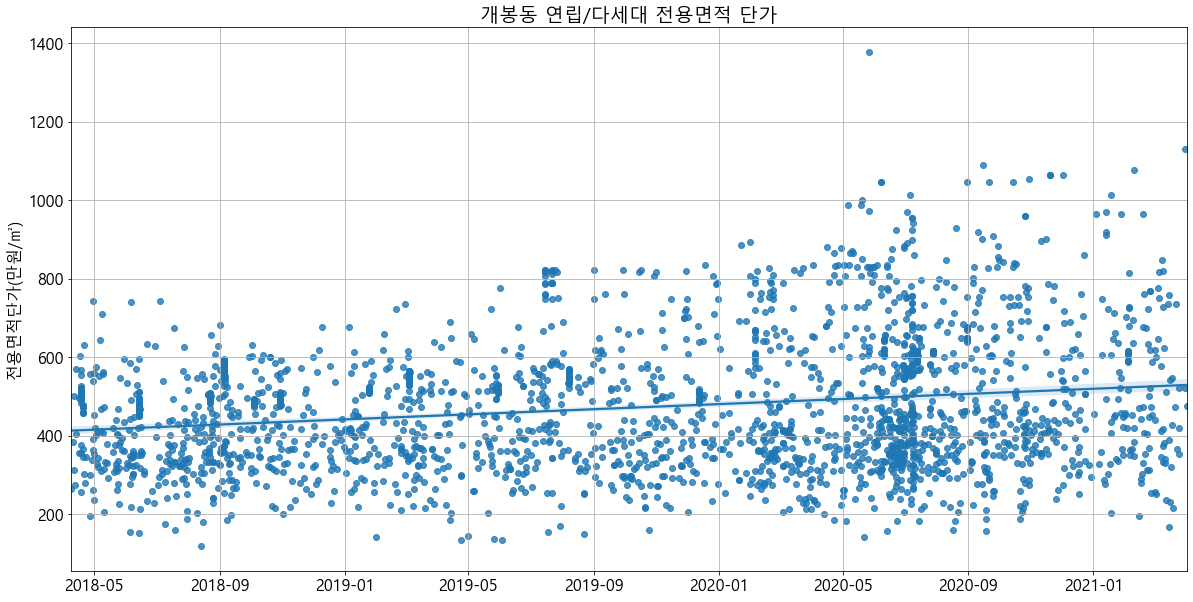

In [19]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
plt.title('개봉동 연립/다세대 전용면적 단가')
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['전용면적단가(만원/㎡)'])
#plt.savefig('./국토교통부_실거래가_공개시스템/집값분석/개봉동_2종일반_3종일반/산포도.png')

In [ ]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
#plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(guro_officetel_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_officetel_df['계약날짜']), y=guro_officetel_df['전용면적단가(만원/㎡)'])
#plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

In [ ]:
summary_df = guro_officetel_df[['지번주소', '평균단가']].drop_duplicates().reset_index(drop=True)
print(summary_df.shape)
summary_df

In [ ]:
hanmyun_df = yunrip_merge_df[(yunrip_merge_df['도로접면'].str.contains('한면'))&(yunrip_merge_df['건물연식'] <= 5)]
print(hanmyun_df.shape)
hanmyun_df.head()

In [ ]:
gagzi_df = yunrip_merge_df[yunrip_merge_df['도로접면'].str.contains('각지')&(yunrip_merge_df['건물연식'] <= 5)]
print(gagzi_df.shape)
gagzi_df.head()

In [ ]:
hanmyun_df['전용면적단가(만원/㎡)'].describe()

In [ ]:
gagzi_df['전용면적단가(만원/㎡)'].describe()

In [ ]:
gagzi_df['전용면적단가(만원/㎡)'].median() / hanmyun_df['전용면적단가(만원/㎡)'].median()

In [ ]:
guro_df = yunrip_merge_df[(yunrip_merge_df['지번주소'].str.contains('구로동'))&
                          (yunrip_merge_df['계약날짜'].dt.year >= target_year)&
                          (yunrip_merge_df['건물연식'] <= 5)
                         ]
print(guro_df.shape)

In [ ]:
guro_df.head()

In [ ]:
guro_df['전용면적단가(만원/㎡)'].describe()

In [ ]:
guro_df['전용면적단가(만원/㎡)'].hist(bins=100)

In [ ]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
#plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(guro_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_df['계약날짜']), y=guro_df['전용면적단가(만원/㎡)'])
#plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

In [ ]:
guro_officetel_df = officetel_merge_df[(officetel_merge_df['지번주소'].str.contains('구로동'))&
                                       (officetel_merge_df['계약날짜'].dt.year <= 2020)&
                                       (officetel_merge_df['계약날짜'].dt.year >= 2018)&
                                       (officetel_merge_df['건물연식'] <= 5)
                                      ]
print(guro_officetel_df.shape)

In [ ]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
#plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(guro_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_df['계약날짜']), y=guro_df['전용면적단가(만원/㎡)'])
ax.xaxis.update_units(guro_officetel_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_officetel_df['계약날짜']), y=guro_officetel_df['전용면적단가(만원/㎡)'])
#plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

In [ ]:
guro_officetel_df['지번주소'].nunique()

In [ ]:
guro_officetel_df['지번주소'].unique()

In [ ]:
guro_officetel_df = officetel_merge_df[(officetel_merge_df['지번주소'].str.contains('구로동'))&
                                       (officetel_merge_df['계약날짜'].dt.year <= 2020)&
                                       (officetel_merge_df['계약날짜'].dt.year >= 2018)&
                                       (officetel_merge_df['건물연식'] <= 5)
                                      ]
print(guro_officetel_df.shape)
guro_officetel_df['지번주소'].nunique()

In [ ]:
guro_officetel_df['평균단가'] = guro_officetel_df[['지번주소', '전용면적단가(만원/㎡)']].groupby(['지번주소']).transform('mean')['전용면적단가(만원/㎡)']

In [ ]:
summary_df['평균단가'].mean()